In [153]:
#IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
# To calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [25]:
#READ THE DATA AS DATA FRAME
df = pd.read_csv('bank-full.csv')

In [27]:
#BASIC EDA(EXPLORATORY DATA ANALYSIS)

In [29]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [31]:
#SHAPE OF THE DATA
df.shape

(45211, 17)

In [33]:
#DATA TYPE OF EACH ATTRIBUTE
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [35]:
#CHECKING THE PRESENCE OF MISSING VALUES
df.isnull().sum()
#There is no missing value in any column.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [37]:
#DISPLAY 5-POINT SUMMARY OF NUMERICAL ATTRIBUTES WITH describe() function
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [39]:
#CHECK THE PRESENCE OF OUTLIERS

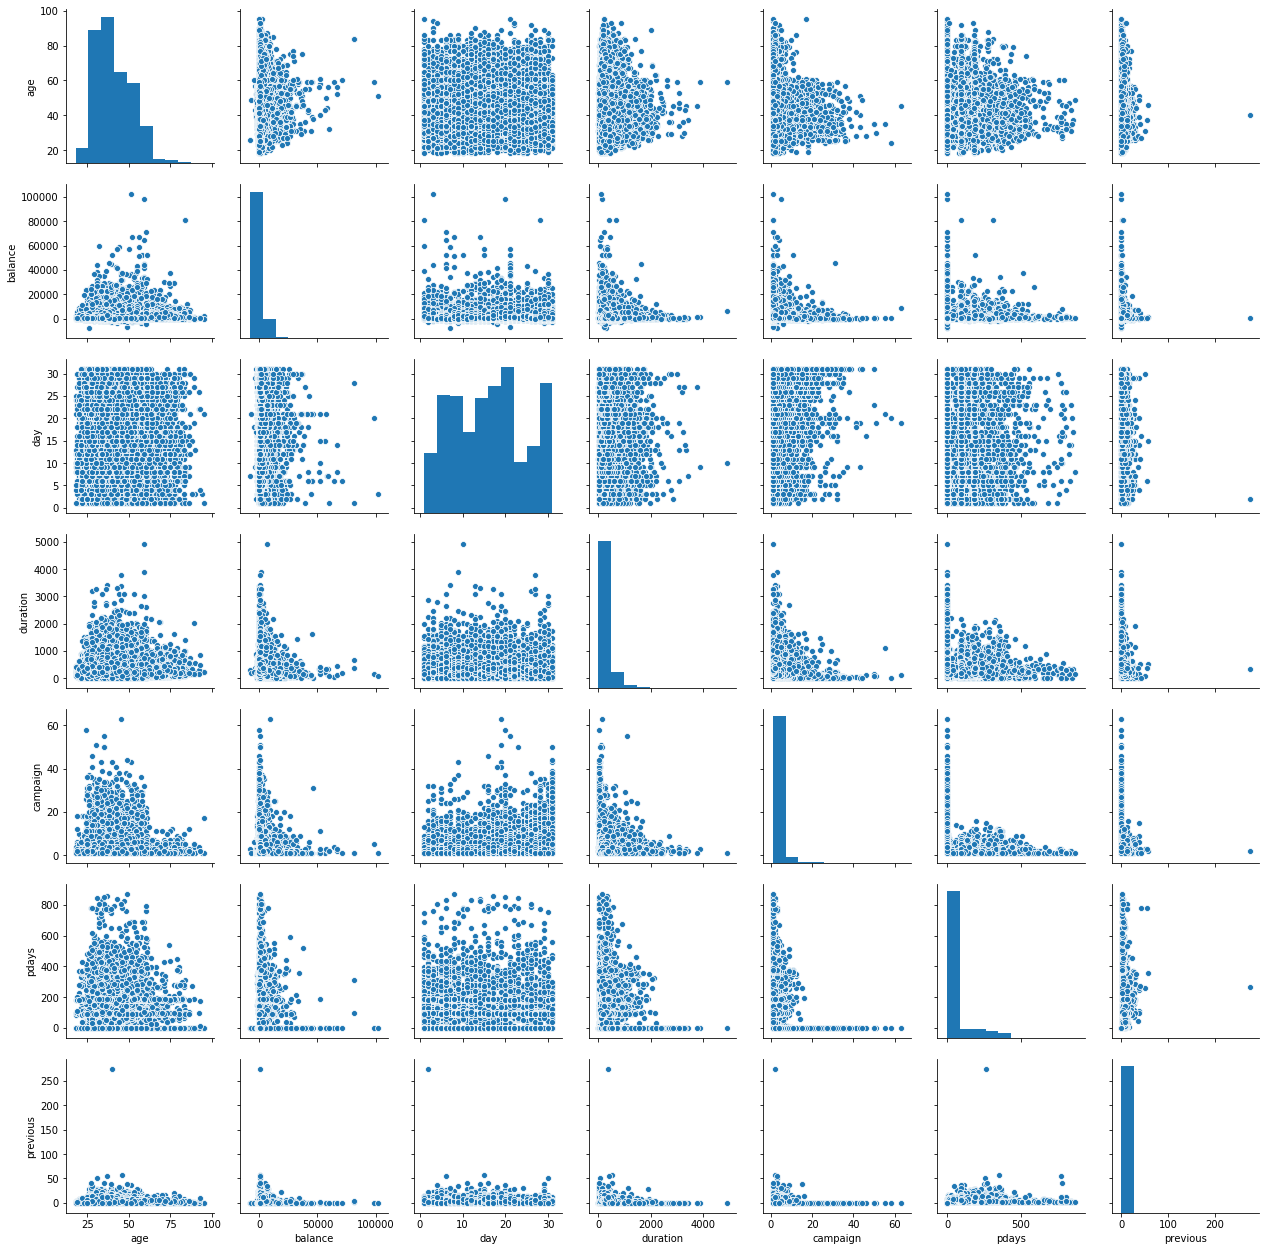

In [41]:
sns.pairplot(df)

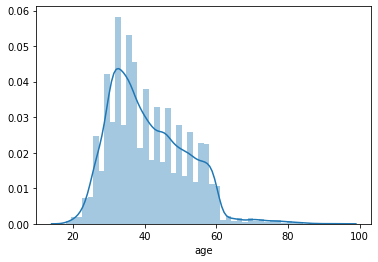

In [43]:
sns.distplot(df['age'])

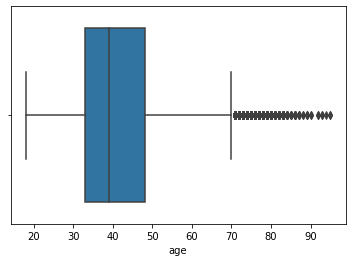

In [45]:
sns.boxplot(x=df['age'])

In [47]:
#According to the describe() function, dist plot and box plot, 'age' column does have some outliers towards the right tail.

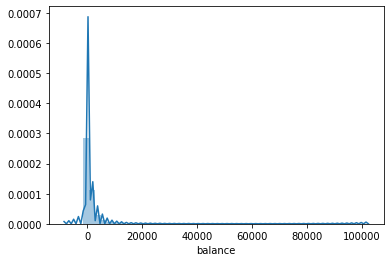

In [49]:
sns.distplot(df['balance'])

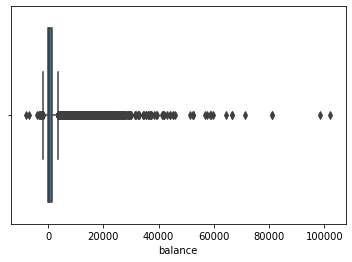

In [50]:
sns.boxplot(x=df['balance'])

In [51]:
#According to the describe() function, dist plot and box plot, 'balance' column has few outliers towards the left tail and other outliers towards the right tail.

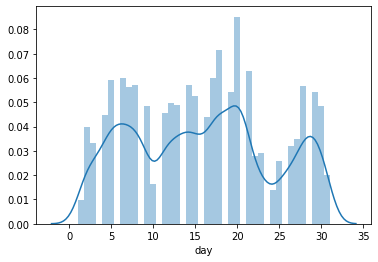

In [52]:
sns.distplot(df['day'])

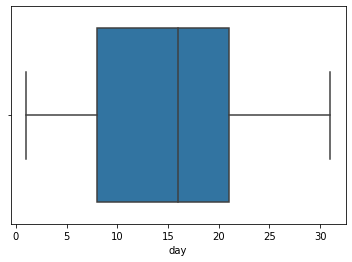

In [53]:
sns.boxplot(df['day'])

In [54]:
#According to the describe() function, dist plot and box plot, 'day' column does NOT have any outlier.

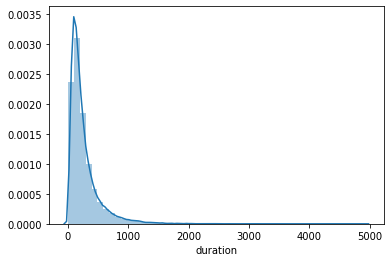

In [55]:
sns.distplot(df['duration'])

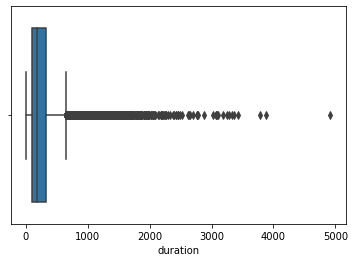

In [56]:
sns.boxplot(x=df['duration'])

In [57]:
#According to the describe() function, dist plot and box plot, 'duration' column does have outliers towards the right tail.

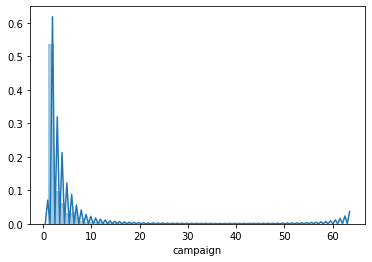

In [58]:
sns.distplot(df['campaign'])

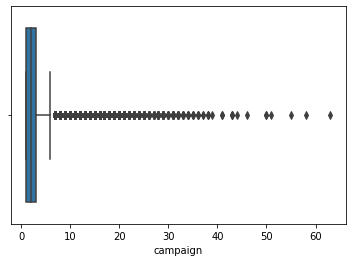

In [59]:
sns.boxplot(x=df['campaign'])

In [60]:
#According to the describe() function, dist plot and box plot, 'campaign' column does have outliers towards the right tail.

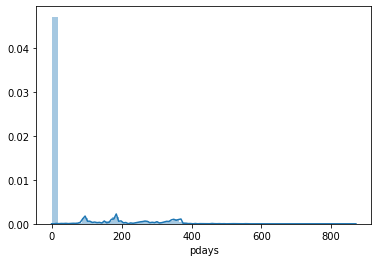

In [61]:
sns.distplot(df['pdays'])

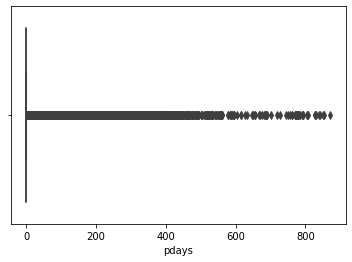

In [62]:
sns.boxplot(df['pdays'])

In [63]:
#According to the describe() function, dist plot and box plot, 'pdays' column has most of the values '-1' (min., 25 percentile, median, 75 percentile). So, it does not represent a normal distribution with outlier(s).

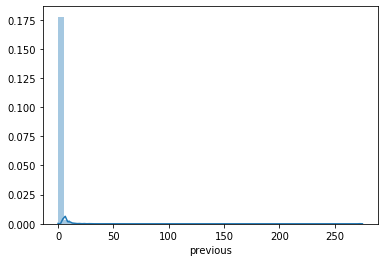

In [64]:
sns.distplot(df['previous'])

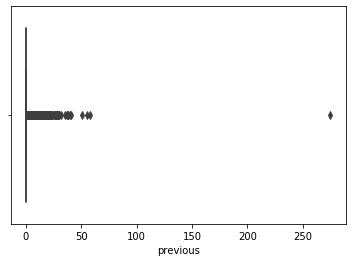

In [65]:
sns.boxplot(df['previous'])

In [66]:
#According to the describe() function, dist plot and box plot, 'previous' column has most of the values '0' (min., 25 percentile, median, 75 percentile). So, it does not represent a normal distribution with outlier(s).

In [67]:
#Now as per the plots for 'pdays' and 'previous' attributes, it can be seen that these two columns are not serving much value to the prediction as these have poor distribution of its values.

In [85]:
( (df['pdays'] == -1).sum() / df.shape[0] ) * 100
#It is better to drop this attribute.

81.73674548229414

In [89]:
df.drop('pdays', axis = 1, inplace = True)

In [90]:
( (df['previous'] == 0).sum() / df.shape[0] ) * 100
#It is better to drop this attribute.

81.73674548229414

In [91]:
df.drop('previous', axis = 1, inplace = True)

In [92]:
#Analyzing categorical attributes

In [93]:
df['job'].value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [94]:
df['marital'].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [96]:
df['education'].value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

In [97]:
df['default'].value_counts(normalize=True)

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [98]:
df['housing'].value_counts(normalize=True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [99]:
df['loan'].value_counts(normalize=True)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

In [100]:
df['contact'].value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [101]:
df['month'].value_counts(normalize=True)

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

In [102]:
df['poutcome'].value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

In [103]:
df['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

In [104]:
#Encode every unique value for all object type columns.
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
age          45211 non-null int64
job          45211 non-null int8
marital      45211 non-null int8
education    45211 non-null int8
default      45211 non-null int8
balance      45211 non-null int64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int8
day          45211 non-null int64
month        45211 non-null int8
duration     45211 non-null int64
campaign     45211 non-null int64
poutcome     45211 non-null int8
Target       45211 non-null int8
dtypes: int64(5), int8(10)
memory usage: 2.2 MB


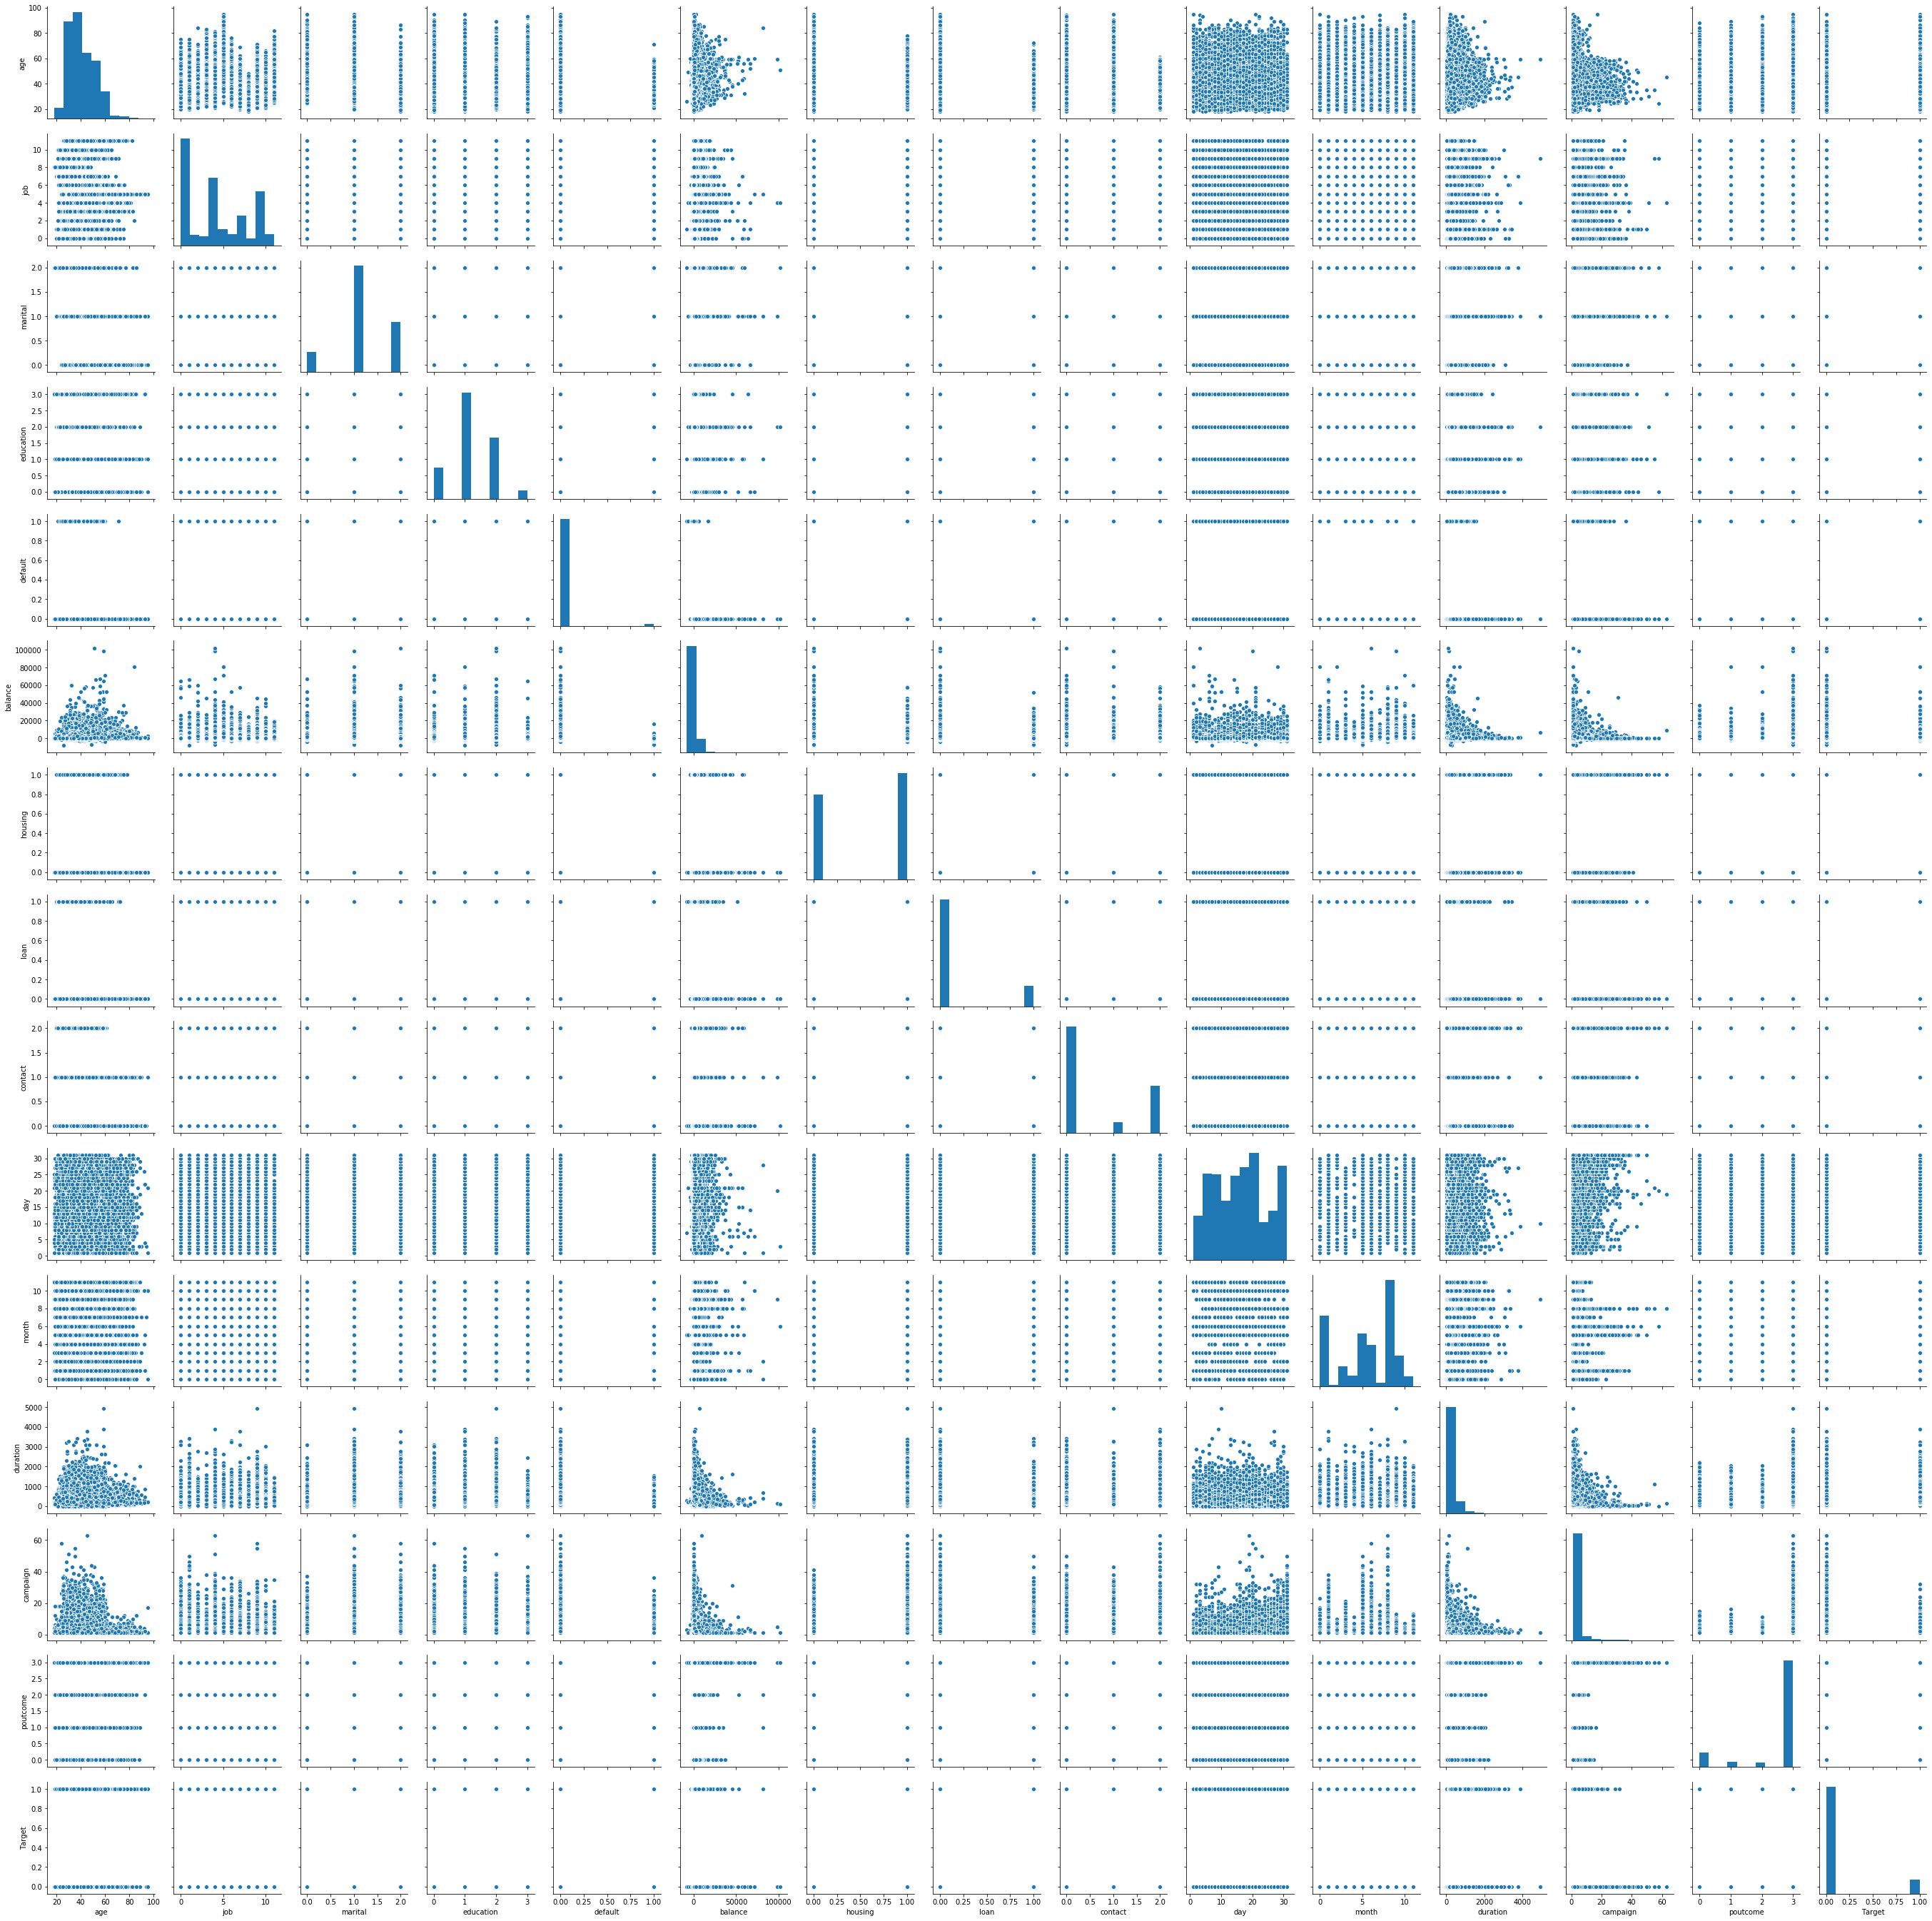

In [106]:
sns.pairplot(df)

In [125]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,3,0


In [ ]:
#TRAIN A FEW STANDARD CLASSIFICATION ALGORITHMS, NOTE AND COMMENT ON THEIR PERFORMANCES ALONG DIFFERENT METRICS.

In [111]:
#Using Decision Tree classification

# Splitting data into training and test set for independent attributes
train_set = df.head(31648) # Up to the last initial training set row (70%)
test_set = df.tail(13563) # Past the last initial training set row (30%)

# Capture the target column ("default") into separate vectors for training set and test set
train_labels = train_set.pop("Target")
test_labels = test_set.pop("Target")

dt_model = DecisionTreeClassifier(criterion = 'entropy' )

dt_model.fit(train_set, train_labels)

print('DT score on training set: ', dt_model.score(train_set, train_labels))
dtModelScore = dt_model.score(test_set, test_labels)
dtYPredict = dt_model.predict(test_set)
print('Decision Tree model Score: ', dtModelScore)
      
dtCM = metrics.confusion_matrix(test_labels, dtYPredict)
print('Confusion matrix:\n', dtCM)
      
#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
dtRecallFor0 = recall_score(test_labels, dtYPredict, pos_label=0)
dtRecallFor1 = recall_score(test_labels, dtYPredict, pos_label=1)

print('Recall for 0: ', dtRecallFor0)
print('Recall for 1: ', dtRecallFor1)

dtPrecisionFor0 = precision_score(test_labels, dtYPredict, pos_label=0)
dtPrecisionFor1 = precision_score(test_labels, dtYPredict, pos_label=1)

print('Precision for 0: ', dtPrecisionFor0)
print('Precision for 1: ', dtPrecisionFor1)

#According to the output, the decision tree model scores 0.599 which is poor. As the model scores a complete 1.0 on the training set, it shows us that the model is overfitted. The decision tree needs to be regularized by changing the hyper parameters.
#With the confusion matrix output, recall and precision are calculated for both 0(not subscribed to term deposit) and 1(subscribed to term deposit). Looking at these, performance for 0 is however better than the performance for 1, much because there are more records for 0 than for 1.

DT score on training set:  1.0
Decision Tree model Score:  0.5997935559979356
Confusion matrix:
 [[6821 3293]
 [2135 1314]]
Recall for 0:  0.6744117065453826
Recall for 1:  0.38097999420121775
Precision for 0:  0.7616123269316659
Precision for 1:  0.2852181462991101


In [122]:
#Regularize the Decision Tree
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [123]:
regDtYPredict = reg_dt_model.predict(test_set)
regDtModelScore = reg_dt_model.score(test_set , test_labels)
print('Regularized Decision Tree model Score: ', regDtModelScore)

Regularized Decision Tree model Score:  0.7513824375138244


In [124]:
regDtCM = metrics.confusion_matrix(test_labels, regDtYPredict)
print('Confusion matrix:\n', regDtCM)
      
#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
regDtRecallFor0 = recall_score(test_labels, regDtYPredict, pos_label=0)
regDtRecallFor1 = recall_score(test_labels, regDtYPredict, pos_label=1)

print('Recall for 0: ', regDtRecallFor0)
print('Recall for 1: ', regDtRecallFor1)

regDtPrecisionFor0 = precision_score(test_labels, regDtYPredict, pos_label=0)
regDtPrecisionFor1 = precision_score(test_labels, regDtYPredict, pos_label=1)

print('Precision for 0: ', regDtPrecisionFor0)
print('Precision for 1: ', regDtPrecisionFor1)

Confusion matrix:
 [[9282  832]
 [2540  909]]
Recall for 0:  0.9177377892030848
Recall for 1:  0.2635546535227602
Precision for 0:  0.785146337337168
Precision for 1:  0.5221137277426766


In [133]:
X = df.values[:,:14]  ## Features
Y = df.values[:,14]  ## Target

#Split the data into train and test set. test set size = 30% of the original combined data.
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [134]:
#With the help of preprocessing function, it would be better to regularize the values in the attributes.
xTrain = preprocessing.scale(xTrain)
xTest = preprocessing.scale(xTest)

In [136]:
#Naive Bayes
nb = GaussianNB()
nb.fit(xTrain, yTrain)
nbYPredict = nb.predict(xTest)

nbAccuracy = accuracy_score(yTest, nbYPredict, normalize = True)
print('Accuracy: ', nbAccuracy)

nbCM = metrics.confusion_matrix(yTest, nbYPredict)
print('Confusion Matrix: ', nbCM)

#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
nbRecallFor0 = recall_score(yTest, nbYPredict, pos_label=0)
nbRecallFor1 = recall_score(yTest, nbYPredict, pos_label=1)

print('Recall for 0: ', nbRecallFor0)
print('Recall for 1: ', nbRecallFor1)

nbPrecisionFor0 = precision_score(yTest, nbYPredict, pos_label=0)
nbPrecisionFor1 = precision_score(yTest, nbYPredict, pos_label=1)

print('Precision for 0: ', nbPrecisionFor0)
print('Precision for 1: ', nbPrecisionFor1)

Accuracy:  0.8682542023002064
Confusion Matrix:  [[11118   895]
 [  892   659]]
Recall for 0:  0.9254973778406727
Recall for 1:  0.42488716956802064
Precision for 0:  0.9257285595337219
Precision for 1:  0.4240669240669241


In [147]:
#Build the ensemble models and compare the results with the base models.

In [148]:
#Ensemble methods on Decision Tree

In [140]:
#Bagging Classifier ensemble method
dtBgCl = BaggingClassifier(base_estimator = reg_dt_model, n_estimators=50)

dtBgCl = dtBgCl.fit(train_set, train_labels)

dtBgClYPredict = dtBgCl.predict(test_set)
dtBgClScore = dtBgCl.score(test_set, test_labels)
print('Score: ', dtBgClScore)

dtBgClCM = metrics.confusion_matrix(test_labels, dtBgClYPredict)
print('Confusion matrix:\n', dtBgClCM)

#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
dtBgClRecallFor0 = recall_score(test_labels, dtBgClYPredict, pos_label=0)
dtBgClRecallFor1 = recall_score(test_labels, dtBgClYPredict, pos_label=1)

print('Recall for 0: ', dtBgClRecallFor0)
print('Recall for 1: ', dtBgClRecallFor1)

dtBgClPrecisionFor0 = precision_score(test_labels, dtBgClYPredict, pos_label=0)
dtBgClPrecisionFor1 = precision_score(test_labels, dtBgClYPredict, pos_label=1)

print('Precision for 0: ', dtBgClPrecisionFor0)
print('Precision for 1: ', dtBgClPrecisionFor1)

Score:  0.7553638575536386
Confusion matrix:
 [[9529  585]
 [2733  716]]
Recall for 0:  0.9421593830334191
Recall for 1:  0.20759640475500146
Precision for 0:  0.7771162942423748
Precision for 1:  0.5503458877786318


In [143]:
#Random forest classifier ensemble method on Decision Tree
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

dtRfClYPredict = rfcl.predict(test_set)
dtRfClScore = rfcl.score(test_set , test_labels)
print('Score: ', dtBgClScore)

dtRfClCM = metrics.confusion_matrix(test_labels, dtRfClYPredict)
print('Confusion matrix:\n', dtRfClCM)

#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
dtRfClRecallFor0 = recall_score(test_labels, dtRfClYPredict, pos_label=0)
dtRfClRecallFor1 = recall_score(test_labels, dtRfClYPredict, pos_label=1)

print('Recall for 0: ', dtRfClRecallFor0)
print('Recall for 1: ', dtRfClRecallFor1)

dtRfClPrecisionFor0 = precision_score(test_labels, dtRfClYPredict, pos_label=0)
dtRfClPrecisionFor1 = precision_score(test_labels, dtRfClYPredict, pos_label=1)

print('Precision for 0: ', dtRfClPrecisionFor0)
print('Precision for 1: ', dtRfClPrecisionFor1)

Score:  0.7553638575536386
Confusion matrix:
 [[9620  494]
 [2813  636]]
Recall for 0:  0.9511568123393316
Recall for 1:  0.18440127573209625
Precision for 0:  0.773747285450012
Precision for 1:  0.5628318584070796


In [144]:
#Ensemble methods on Naive Bayes

#Bagging Classifier ensemble method
nbBgCl = BaggingClassifier(base_estimator = nb, n_estimators=50)

nbBgCl = nbBgCl.fit(xTrain, yTrain)

nbBgClYPredict = nbBgCl.predict(xTest)
nbBgClAccuracy = accuracy_score(yTest, nbBgClYPredict, normalize = True)
print('Accuracy: ', nbBgClAccuracy)

nbBgClCM = metrics.confusion_matrix(yTest, nbBgClYPredict)
print('Confusion Matrix: ', nbBgClCM)

#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
nbBgClRecallFor0 = recall_score(yTest, nbBgClYPredict, pos_label=0)
nbBgClRecallFor1 = recall_score(yTest, nbBgClYPredict, pos_label=1)

print('Recall for 0: ', nbBgClRecallFor0)
print('Recall for 1: ', nbBgClRecallFor1)

nbBgClPrecisionFor0 = precision_score(yTest, nbBgClYPredict, pos_label=0)
nbBgClPrecisionFor1 = precision_score(yTest, nbBgClYPredict, pos_label=1)

print('Precision for 0: ', nbBgClPrecisionFor0)
print('Precision for 1: ', nbBgClPrecisionFor1)

Accuracy:  0.8682542023002064
Confusion Matrix:  [[11118   895]
 [  892   659]]
Recall for 0:  0.9254973778406727
Recall for 1:  0.42488716956802064
Precision for 0:  0.9257285595337219
Precision for 1:  0.4240669240669241


In [146]:
#AdaBoost Classifier ensemble method on Naive Bayes
nbAbCl = AdaBoostClassifier(base_estimator= nb, n_estimators=10)

nbAbCl = nbAbCl.fit(xTrain, yTrain)

nbAbClYPredict = nbAbCl.predict(xTest)
nbAbClAccuracy = accuracy_score(yTest, nbAbClYPredict, normalize = True)
print('Accuracy: ', nbAbClAccuracy)

nbAbClCM = metrics.confusion_matrix(yTest, nbAbClYPredict)
print('Confusion Matrix: ', nbAbClCM)

#As precision and recall are class level performance measures, we calculate them for both 0 and 1 classes.
nbAbClRecallFor0 = recall_score(yTest, nbAbClYPredict, pos_label=0)
nbAbClRecallFor1 = recall_score(yTest, nbAbClYPredict, pos_label=1)

print('Recall for 0: ', nbAbClRecallFor0)
print('Recall for 1: ', nbAbClRecallFor1)

nbAbClPrecisionFor0 = precision_score(yTest, nbAbClYPredict, pos_label=0)
nbAbClPrecisionFor1 = precision_score(yTest, nbAbClYPredict, pos_label=1)

print('Precision for 0: ', nbAbClPrecisionFor0)
print('Precision for 1: ', nbAbClPrecisionFor1)

Accuracy:  0.624447065762312
Confusion Matrix:  [[8100 3913]
 [1181  370]]
Recall for 0:  0.6742695413302255
Recall for 1:  0.2385557704706641
Precision for 0:  0.8727507811658226
Precision for 1:  0.08638804576231614


In [152]:
#COMPARE PERFORMANCES OF ALL THE MODELS
performance = pd.DataFrame(data = {'Model Name': ['Decision Tree', 'Naive Bayes', 'DT Bagging', 'DT Random Forest', 'NB Bagging', 'NB Adaboost'], 'Accuracy': [regDtModelScore, nbAccuracy, dtBgClScore, dtRfClScore, nbBgClAccuracy, nbAbClAccuracy], 'Recall(Yes,No)': [(regDtRecallFor1, regDtRecallFor0), (nbRecallFor1, nbRecallFor0), (dtBgClRecallFor1, dtBgClRecallFor0), (dtRfClRecallFor1, dtRfClRecallFor0), (nbBgClRecallFor1, nbBgClRecallFor0), (nbAbClRecallFor1, nbAbClRecallFor0)], 'Precision(Yes,No)': [(regDtPrecisionFor1, regDtPrecisionFor0), (nbPrecisionFor1, nbPrecisionFor0), (dtBgClPrecisionFor1, dtBgClPrecisionFor0), (dtRfClPrecisionFor1, dtRfClPrecisionFor0), (nbBgClPrecisionFor1, nbBgClPrecisionFor0), (nbAbClPrecisionFor1, nbAbClPrecisionFor0)]})
print(performance)

         Model Name  Accuracy                             Recall(Yes,No)  \
0     Decision Tree  0.751382   (0.2635546535227602, 0.9177377892030848)   
1       Naive Bayes  0.868254  (0.42488716956802064, 0.9254973778406727)   
2        DT Bagging  0.755364  (0.20759640475500146, 0.9421593830334191)   
3  DT Random Forest  0.756175  (0.18440127573209625, 0.9511568123393316)   
4        NB Bagging  0.868254  (0.42488716956802064, 0.9254973778406727)   
5       NB Adaboost  0.624447   (0.2385557704706641, 0.6742695413302255)   

                           Precision(Yes,No)  
0    (0.5221137277426766, 0.785146337337168)  
1   (0.4240669240669241, 0.9257285595337219)  
2   (0.5503458877786318, 0.7771162942423748)  
3    (0.5628318584070796, 0.773747285450012)  
4   (0.4240669240669241, 0.9257285595337219)  
5  (0.08638804576231614, 0.8727507811658226)  
